In [26]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
colunas = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
           'serum_cholestoral', 'fasting_blood_sugar', 'restecg', 'max_hrate',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
full_data = pd.read_csv("src/processed.cleveland.data.csv", names=colunas, na_values=["?"])
full_data.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,restecg,max_hrate,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [48]:
data = full_data.dropna()

X = data[colunas[:-1]]
Y = data[colunas[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

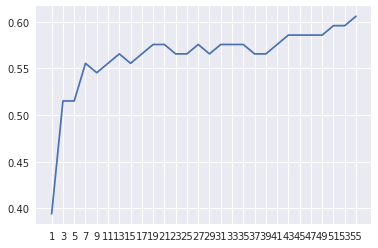

In [49]:
scores = []
ks = range(1,56,2)
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_predict))

plt.xticks(ks)
plt.plot(ks, scores)